In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-election-2024/may_july_chunk_1.csv


In [3]:
data=pd.read_csv('/kaggle/input/us-election-2024/may_july_chunk_1.csv',encoding='utf-8')
data.head(5)
data.columns

Index(['id', 'text', 'url', 'epoch', 'media', 'retweetedTweet',
       'retweetedTweetID', 'retweetedUserID', 'id_str', 'lang', 'rawContent',
       'replyCount', 'retweetCount', 'likeCount', 'quoteCount',
       'conversationId', 'conversationIdStr', 'hashtags', 'mentionedUsers',
       'links', 'viewCount', 'quotedTweet', 'in_reply_to_screen_name',
       'in_reply_to_status_id_str', 'in_reply_to_user_id_str', 'location',
       'cash_app_handle', 'user', 'date', '_type'],
      dtype='object')

In [4]:
data['likeCount']=data['likeCount'].astype(int)

In [5]:
sorted_df = data.sort_values(by='likeCount', ascending=False)
pd.set_option('display.max_columns', None)
sorted_df.head(10)

,id,text,url,epoch,media,retweetedTweet,retweetedTweetID,retweetedUserID,id_str,lang,rawContent,replyCount,retweetCount,likeCount,quoteCount,conversationId,conversationIdStr,hashtags,mentionedUsers,links,viewCount,quotedTweet,in_reply_to_screen_name,in_reply_to_status_id_str,in_reply_to_user_id_str,location,cash_app_handle,user,date,_type
33712,1801013865242665469,It took Joe Biden exactly 3 seconds to forget ...,https://twitter.com/DschlopesIsBack/status/180...,1718230141,"[{'display_url': 'pic.x.com/v3eeouafuz', 'expa...",False,NaN,NaN,1801013865242665469,en,It took Joe Biden exactly 3 seconds to forget ...,1816,11033,94284,2435.0,1.801014e+18,1.801014e+18,[],[],[],"{'count': '15979490', 'state': 'EnabledWithCou...",False,NaN,NaN,NaN,NaN,NaN,"{'id': 1329883229189525505, 'id_str': '1329883...",NaN,NaN
9005,1801034328224248054,Joe Biden when they ask him to draw a clock: h...,https://twitter.com/ConsiderdLobstr/status/180...,1718235020,"[{'display_url': 'pic.x.com/pdkzyokybb', 'expa...",False,NaN,NaN,1801034328224248054,en,Joe Biden when they ask him to draw a clock: h...,35,1979,43242,84.0,1.801034e+18,1.801034e+18,[],[],[],"{'count': '902506', 'state': 'EnabledWithCount'}",False,NaN,NaN,NaN,NaN,NaN,"{'id': 360907123, 'id_str': '360907123', 'url'...",NaN,NaN
11183,1801032553173835875,I said we’d move heaven and earth to reopen th...,https://twitter.com/POTUS/status/1801032553173...,1718234596,"[{'display_url': 'pic.x.com/ssex3mfqyx', 'expa...",False,NaN,NaN,1801032553173835875,en,I said we’d move heaven and earth to reopen th...,2774,7826,33149,362.0,1.801033e+18,1.801033e+18,[],[],[],"{'count': '970798', 'state': 'EnabledWithCount'}",False,NaN,NaN,NaN,NaN,NaN,"{'id': 1349149096909668363, 'id_str': '1349149...",NaN,NaN
26667,1801019626127499301,Steven Bannon is going to prison for ignoring ...,https://twitter.com/Travis_4_Trump/status/1801...,1718231514,[],False,NaN,NaN,1801019626127499301,en,Steven Bannon is going to prison for ignoring ...,952,9236,30712,180.0,1.801020e+18,1.801020e+18,[],[],[],"{'count': '455311', 'state': 'EnabledWithCount'}",False,NaN,NaN,NaN,NaN,NaN,"{'id': 930212715422998530, 'id_str': '93021271...",NaN,NaN
26111,1801020094786543627,🚨Breaking: The Biden campaign has demanded tha...,https://twitter.com/VoteHarrisOut/status/18010...,1718231626,[],False,NaN,NaN,1801020094786543627,en,🚨Breaking: The Biden campaign has demanded tha...,2145,5167,29135,344.0,1.801020e+18,1.801020e+18,[],[],[],"{'count': '1467117', 'state': 'EnabledWithCount'}",False,NaN,NaN,NaN,NaN,NaN,"{'id': 1695193884769271808, 'id_str': '1695193...",NaN,NaN
3185,1801039015723909350,"Conservative ""christians"" hitting like on all ...",https://twitter.com/acnewsitics/status/1801039...,1718236137,"[{'display_url': 'pic.x.com/2omlpqyjqs', 'expa...",False,NaN,NaN,1801039015723909350,en,"Conservative ""christians"" hitting like on all ...",1367,4049,25487,209.0,1.801039e+18,1.801039e+18,[],[],[],"{'count': '474706', 'state': 'EnabledWithCount'}",False,NaN,NaN,NaN,NaN,NaN,"{'id': 1080188052365029376, 'id_str': '1080188...",NaN,NaN
15911,1801028518320505047,🚨Trump Lawyer Alina Habba Demands SPECIAL COUN...,https://twitter.com/bennyjohnson/status/180102...,1718233634,"[{'display_url': 'pic.x.com/pf7qqu4tlo', 'expa...",False,NaN,NaN,1801028518320505047,en,🚨Trump Lawyer Alina Habba Demands SPECIAL COUN...,1032,3902,23441,44.0,1.801029e+18,1.801029e+18,[],[],[],"{'count': '1029799', 'state': 'EnabledWithCount'}",False,NaN,NaN,NaN,NaN,NaN,"{'id': 15212187, 'id_str': '15212187', 'url': ...",NaN,NaN
19326,1801025543803974089,🚨🇺🇸 Holy Crap - They aren’t even attempting to...,https://twitter.com/BGatesIsaPyscho/status/180...,1718232925,"[{'display_url': 'pic.x.com/muiesalpuw', 'expa...",False,NaN,NaN,1801025543803974089,en,🚨🇺🇸 Holy Crap - They aren’t even attempting to...,1577,4689,21561,707.0,1.801026e+18,1.801026e+18,[],[],[],"{'count': '9219204', 'state': 'EnabledWithCount'}",False,NaN,NaN,NaN,NaN,NaN,"{'id': 629698642, 'id_str': '629698642', 'url'...

In [6]:
sorted_df=sorted_df[:10000]

In [7]:
pip install sentence_transformers umap-learn hdbscan


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 6.1 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 58.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [8]:
sorted_df

,id,text,url,epoch,media,retweetedTweet,retweetedTweetID,retweetedUserID,id_str,lang,rawContent,replyCount,retweetCount,likeCount,quoteCount,conversationId,conversationIdStr,hashtags,mentionedUsers,links,viewCount,quotedTweet,in_reply_to_screen_name,in_reply_to_status_id_str,in_reply_to_user_id_str,location,cash_app_handle,user,date,_type
33712,1801013865242665469,It took Joe Biden exactly 3 seconds to forget ...,https://twitter.com/DschlopesIsBack/status/180...,1718230141,"[{'display_url': 'pic.x.com/v3eeouafuz', 'expa...",False,NaN,NaN,1801013865242665469,en,It took Joe Biden exactly 3 seconds to forget ...,1816,11033,94284,2435.0,1.801014e+18,1.801014e+18,[],[],[],"{'count': '15979490', 'state': 'EnabledWithCou...",False,NaN,NaN,NaN,NaN,NaN,"{'id': 1329883229189525505, 'id_str': '1329883...",NaN,NaN
9005,1801034328224248054,Joe Biden when they ask him to draw a clock: h...,https://twitter.com/ConsiderdLobstr/status/180...,1718235020,"[{'display_url': 'pic.x.com/pdkzyokybb', 'expa...",False,NaN,NaN,1801034328224248054,en,Joe Biden when they ask him to draw a clock: h...,35,1979,43242,84.0,1.801034e+18,1.801034e+18,[],[],[],"{'count': '902506', 'state': 'EnabledWithCount'}",False,NaN,NaN,NaN,NaN,NaN,"{'id': 360907123, 'id_str': '360907123', 'url'...",NaN,NaN
11183,1801032553173835875,I said we’d move heaven and earth to reopen th...,https://twitter.com/POTUS/status/1801032553173...,1718234596,"[{'display_url': 'pic.x.com/ssex3mfqyx', 'expa...",False,NaN,NaN,1801032553173835875,en,I said we’d move heaven and earth to reopen th...,2774,7826,33149,362.0,1.801033e+18,1.801033e+18,[],[],[],"{'count': '970798', 'state': 'EnabledWithCount'}",False,NaN,NaN,NaN,NaN,NaN,"{'id': 1349149096909668363, 'id_str': '1349149...",NaN,NaN
26667,1801019626127499301,Steven Bannon is going to prison for ignoring ...,https://twitter.com/Travis_4_Trump/status/1801...,1718231514,[],False,NaN,NaN,1801019626127499301,en,Steven Bannon is going to prison for ignoring ...,952,9236,30712,180.0,1.801020e+18,1.801020e+18,[],[],[],"{'count': '455311', 'state': 'EnabledWithCount'}",False,NaN,NaN,NaN,NaN,NaN,"{'id': 930212715422998530, 'id_str': '93021271...",NaN,NaN
26111,1801020094786543627,🚨Breaking: The Biden campaign has demanded tha...,https://twitter.com/VoteHarrisOut/status/18010...,1718231626,[],False,NaN,NaN,1801020094786543627,en,🚨Breaking: The Biden campaign has demanded tha...,2145,5167,29135,344.0,1.801020e+18,1.801020e+18,[],[],[],"{'count': '1467117', 'state': 'EnabledWithCount'}",False,NaN,NaN,NaN,NaN,NaN,"{'id': 1695193884769271808, 'id_str': '1695193...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18609,1801026127420441056,@blackbulldr @reddit_lies I dont support hunte...,https://twitter.com/francofredasst1/status/180...,1718233064,[],False,NaN,NaN,1801026127420441056,en,@blackbulldr @reddit_lies I dont support hunte...,1,0,1,0.0,1.800577e+18,1.800577e+18,[],"[{'id_str': '1536905351722852352', 'name': 'Be...",[],"{'count': '20', 'state': 'EnabledWithCount'}",False,blackbulldr,1.801019e+18,1.536905e+18,NaN,NaN,"{'id': 1619829547922333697, 'id_str': '1619829...",NaN,NaN
18610,1801026126447284564,I’m in love with the prettiest girl in the wor...,https://twitter.com/I3u11ish/status/1801026126...,1718233064,[],False,NaN,NaN,1801026126447284564,en,I’m in love with the prettiest girl in the wor...,1,0,1,0.0,1.801026e+18,1.801026e+18,[],[],[],"{'count': '149', 'state': 'EnabledWithCount'}",False,NaN,NaN,NaN,NaN,NaN,"{'id': 1435169363225726989, 'id_str': '1435169...",NaN,NaN
18612,1801026125822337248,I think any Woman who's the Wife of a politici...,https://twitter.com/MrSpiritsRaven/status/1801...,1718233064,[],False,NaN,NaN,1801026125822337248,en,I think any Woman who's the Wife of a politici...,0,0,1,0.0,1.801026e+18,1.801026e+18,[],[],[],"{'count': '87', 'state': 'EnabledWithCount'}",True,NaN,NaN,NaN,NaN,NaN,"{'id': 1523714107622494208, 'id_str': '1523714...",Na

In [9]:

sorted_df['text']=sorted_df['text'].astype(str)
text=[]
for t in sorted_df['text']:
    text.append(t)

In [10]:
from sentence_transformers import SentenceTransformer

# Pre-calculate embeddings
embedding_model = SentenceTransformer("BAAI/bge-small-en")
embeddings = embedding_model.encode(text, show_progress_bar=True)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/90.8k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/684 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/133M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/313 [00:00<?, ?it/s]

#pip install umap-learn hdbscan
umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine', random_state=42)
hdbscan_model = HDBSCAN(min_cluster_size=150, metric='euclidean', cluster_selection_method='eom', prediction_data=True)

from sklearn.manifold import TSNE
from hdbscan import HDBSCAN

# Initialize t-SNE
tsne_model = TSNE(n_components=5, metric='cosine', random_state=42)

# Assuming `data` is your input data
embedded_data = tsne_model.fit_transform(data)

In [ ]:
embeddings

In [41]:
from sklearn.manifold import TSNE
from hdbscan import HDBSCAN

# Initialize t-SNE with parameters similar to UMAP
tsne_model = TSNE(n_components=5, metric='cosine', random_state=42)

# Initialize HDBSCAN
hdbscan_model = HDBSCAN(min_cluster_size=50, metric='euclidean', cluster_selection_method='eom', prediction_data=True)

print("t-SNE and HDBSCAN models initialized.")


t-SNE and HDBSCAN models initialized.


In [42]:
# Pre-reduce embeddings for visualization purposes
reduced_embeddings = TSNE(n_components=2, metric='cosine', random_state=42).fit_transform(embeddings)


In [14]:
pip install groq

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.1/109.1 kB 2.8 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [83]:
from groq import Groq

client = Groq(api_key='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')

def message(prompt):

    chat_completion = client.chat.completions.create(
        #
        # Required parameters
        #
        messages=[
            # Set an optional system message. This sets the behavior of the
            # assistant and can be used to provide specific instructions for
            # how it should behave throughout the conversation.
            {
                "role": "system",
                "content": "You are a helpful, respectful and honest assistant for labeling topics. provide a topic not more than 10 words. return only topic nothing else"
            },
            # Set a user message for the assistant to respond to.
            {
                "role": "user",
                "content": prompt,
            }
        ],
    
        # The language model which will generate the completion.
        model="llama3-8b-8192",
    
        #
        # Optional parameters
        #
    
        # Controls randomness: lowering results in less random completions.
        # As the temperature approaches zero, the model will become deterministic
        # and repetitive.
        temperature=0.5,
    
        # The maximum number of tokens to generate. Requests can use up to
        # 32,768 tokens shared between prompt and completion.
        max_tokens=1024,
    
        # Controls diversity via nucleus sampling: 0.5 means half of all
        # likelihood-weighted options are considered.
        top_p=1,
    
        # A stop sequence is a predefined or user-specified text string that
        # signals an AI to stop generating content, ensuring its responses
        # remain focused and concise. Examples include punctuation marks and
        # markers like "[end]".
        stop=None,
    
        # If set, partial message deltas will be sent.
        stream=False,
    )
    return chat_completion.choices[0].message.content

In [58]:
message('who is the president of usa')

"I'd be happy to help!\n\nAs of my knowledge cutoff, the current President of the United States is Joe Biden."

In [16]:
pip install --force-reinstall --no-deps numba==0.60.0

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 32.5 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: numba
    Found existing installation: numba 0.60.0
    Uninstalling numba-0.60.0:
      Successfully uninstalled numba-0.60.0
Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install bertopic

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 3.7 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [60]:
prompt='hi'

In [66]:
from bertopic.representation import KeyBERTInspired, MaximalMarginalRelevance, TextGeneration

# KeyBERT
keybert = KeyBERTInspired()

# MMR
mmr = MaximalMarginalRelevance(diversity=0.3)

# All representation models
representation_model = {
    "KeyBERT": keybert,
    "MMR": mmr,
   
}

In [67]:
from bertopic import BERTopic

topic_model = BERTopic(

  # Sub-models
  embedding_model=embedding_model,
  hdbscan_model=hdbscan_model,
  representation_model=representation_model,

  # Hyperparameters
  top_n_words=5,
  verbose=True
)

# Train model
topics, probs = topic_model.fit_transform(text, embeddings)

2024-12-20 10:50:58,081 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-12-20 10:51:09,345 - BERTopic - Dimensionality - Completed ✓
2024-12-20 10:51:09,347 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-12-20 10:51:09,974 - BERTopic - Cluster - Completed ✓
2024-12-20 10:51:09,981 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-12-20 10:51:13,497 - BERTopic - Representation - Completed ✓


In [68]:
# Show topics
topic_model.get_topic_info()

,Topic,Count,Name,Representation,KeyBERT,MMR,Representative_Docs
0,-1,3083,-1_the_biden_to_and,"[the, biden, to, and, is]","[trump, biden, maga, gop, democrats, election,...","[the, biden, trump, co, are, his, joe, we, wil...",[SOCAL MEDIA BLOW UP WITH NONSENSE TRUMP GETS ...
1,0,1646,0_maga_conservative_the_to,"[maga, conservative, the, to, you]","[maga, conservatives, trump2024, liberal, cons...","[maga, conservative, of, they, not, co, like, ...",[@JoeyMannarinoUS @lavern_spicer you know it...
2,1,920,1_https_co_you_it,"[https, co, you, it, this]","[behizytweets, liked, your, my, great, lol, ch...","[like, and, to, love, good, of, can, your, the...","[@TomiLahren @ScottPresler Tomi, OUTSTANDING I..."
3,2,739,2_hunter_biden_the_his,"[hunter, biden, the, his, is]","[biden, trump, convicted, criminal, felon, hun...","[hunter, biden, his, family, convicted, of, fe...",[@WalshFreedom Absolutely. Just like with Hunt...
4,3,674,3_gop_the_to_and,"[gop, the, to, and, for]","[republicans, gop, republican, democrat, democ...","[gop, the, republicans, co, party, will, repub...",[@SpeakerJohnson And the GOP has done nothing ...
5,4,418,4_de_la_que_el,"[de, la, que, el, en]","[estados, estado, biden, trump, desacato, unid...","[con, por, los, co, biden, https, le, presiden...",[Hoy el senador @marcorubio en @TelemundoNews....
6,5,322,5_inflation_the_biden_prices,"[inflation, the, biden, prices, to]","[biden, inflation, trump, dollar, fed, our, mo...","[inflation, the, biden, prices, economy, trump...","[Agitators keep using the term ""Biden's Econom..."
7,6,308,6_garland_the_audio_to,"[garland, the, audio, to, privilege]","[biden, thejusticedept, transcripts, gop, cong...","[garland, privilege, executive, biden, of, tap...",[@Lawfulorawful @TheJusticeDept I don’t need t...
8,7,207,7_biden_joe_biden_my_time_the,"[biden, joe, biden_my_time, the, and]","[biden, biden_my_time, ashy_slashee, buzzpatte...","[biden, joe, biden_my_time, and, america, ashy...","[@Ashy_slashee Joe Biden, @Ashy_slashee Joe Bi..."
9,8,180,8_crypto_bitcoin_donations_coinbase,"[crypto, bitcoin, donations, coinbase, bitcoin...","[bitcoinmagazine, biden, coinbase, altcoins, b...","[crypto, bitcoin, donations, coinbase, bitcoin...",[Joe Biden's campaign is reportedly in talks t...


In [97]:
# Get representative documents for a specific topic
for i in range(-1,25):
    representative_docs = topic_model.get_representative_docs(i)
    
    # Print the representative documents for the outlier topic
    top=" "
    for t in representative_docs:
        top=top+" "+t
    print(f'topic:{i} {message(top)}')


topic:-1 "Social Media Trump Debate Controversy and Political Opinions"
topic:0 Political Party Loyalty and Free Speech
topic:1 Tomi Lahren's Interview with Scott Presler
topic:2 Political Corruption and Influence
topic:3 Political Parties and Their Actions
topic:4 "US Immigration Policy and Asylum Seekers"
topic:5 Economic Misconceptions and Misinformation
topic:6 "Contempt of Congress and Audio Recordings"
topic:7 US Presidential Election
topic:8 Joe Biden's campaign to accept crypto donations
topic:9 Opinions
topic:10 "Hamas' Statement on Biden's Ceasefire Deal"
topic:11 Attorney General Held in Contempt of Congress
topic:12 US-Russia Relations During the Ukraine Conflict
topic:13 Border Security and National Security
topic:14 "Conspiracy Theories About President Biden's Identity"
topic:15 Ron DeSantis' Leadership in Florida
topic:16 Supreme Court Ethics and Transparency
topic:17 Conspiracy Theories About Joe Biden's Identity
topic:18 "Biden's Orange Drink Moment"
topic:19 Election 

In [96]:
topic_model.get_topic(4, full=True)["KeyBERT"]

[('estados', 0.873921),
 ('estado', 0.871869),
 ('biden', 0.8665933),
 ('trump', 0.8524158),
 ('desacato', 0.85236424),
 ('unidos', 0.8492139),
 ('los', 0.84920883),
 ('por', 0.8452886),
 ('esta', 0.84278566),
 ('está', 0.8427856)]

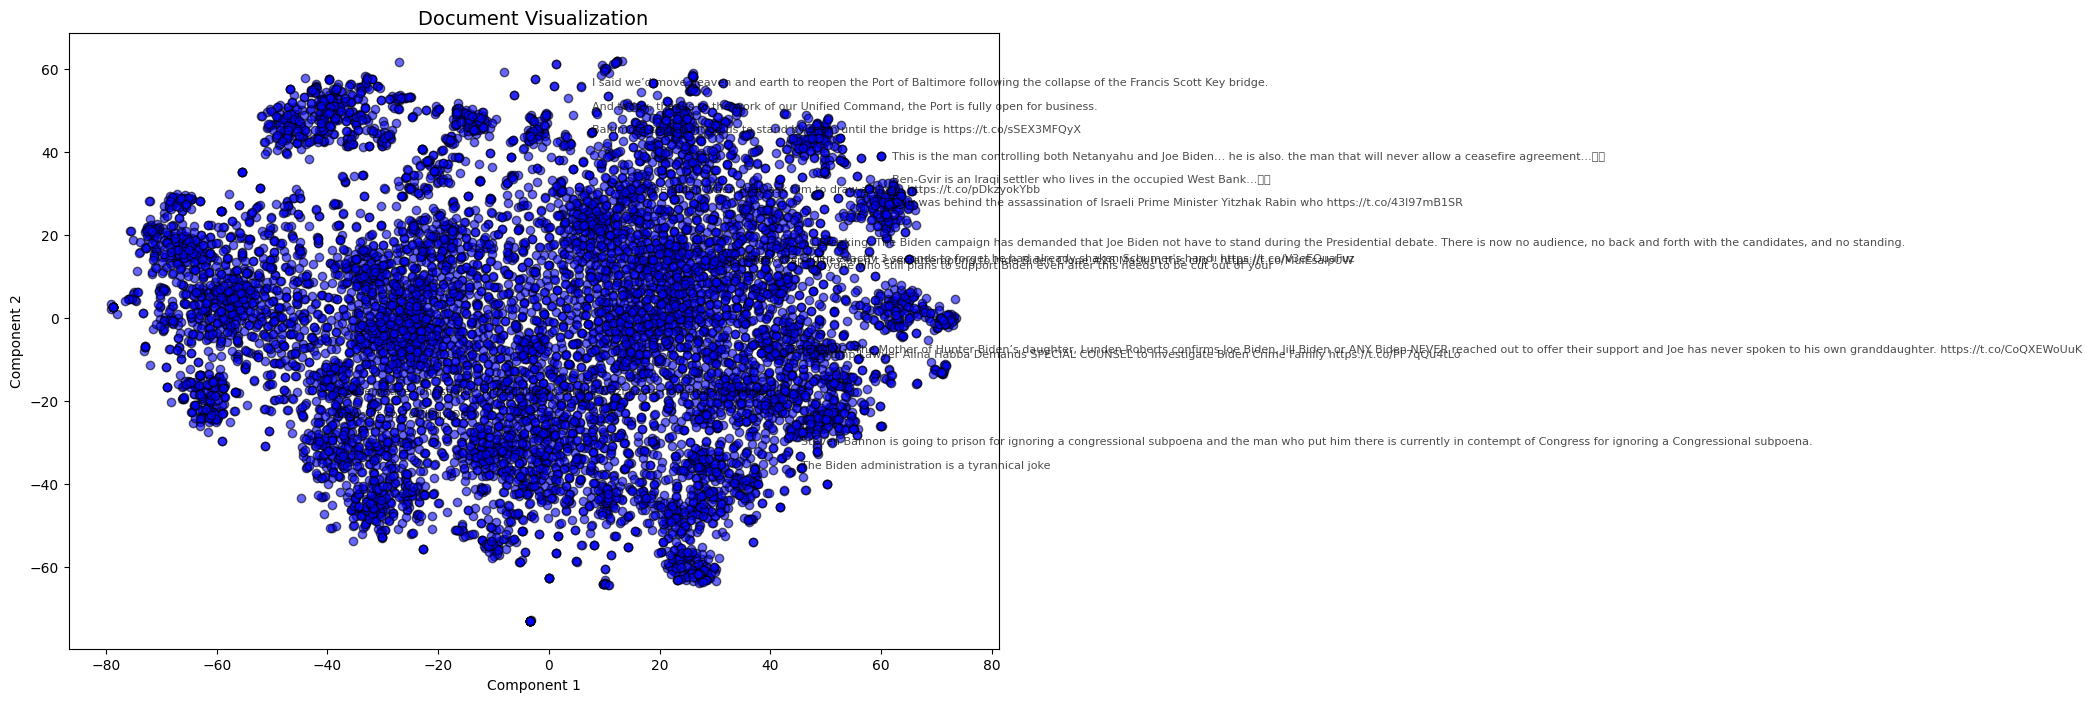

In [98]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming reduced_embeddings and text are defined
# reduced_embeddings is a 2D array of shape (n_documents, 2)
# text is a list of strings representing the document content

# Generate scatter plot
x = reduced_embeddings[:, 0]
y = reduced_embeddings[:, 1]

plt.figure(figsize=(12, 8))
plt.scatter(x, y, c='blue', alpha=0.6, edgecolor='k')

# Add labels for some points (optional)
for i, label in enumerate(text[:10]):  # Limit to first 50 documents to avoid clutter
    plt.annotate(label, (x[i], y[i]), fontsize=8, alpha=0.7)

# Add title and axis labels
plt.title("Document Visualization", fontsize=14)
plt.xlabel("Component 1")
plt.ylabel("Component 2")

# Save as JPG
plt.savefig("document_visualization.jpg", format='jpg', dpi=300)

# Show the plot
plt.show()


# Contextual Embedding

In [107]:
pip install pyvis


/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning:

os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 10.6 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 2.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [108]:
import pandas as pd
import numpy as np
import torch
import os
import re
from collections import OrderedDict
from scipy.spatial.distance import cosine
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

from tqdm import tqdm
import string
import statistics
import re
import joblib
import random
import statistics
from collections import Counter
from scipy import stats
import os
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics.pairwise import cosine_similarity
import zipfile
from matplotlib.lines import Line2D


from transformers import BertModel, BertTokenizer,AutoTokenizer,AutoModel,DataCollatorForLanguageModeling
from transformers import Trainer, TrainingArguments,AutoModelForMaskedLM,ElectraForMaskedLM

from pyvis.network import Network
import networkx as nx
import random

import wandb
wandb.init(mode = 'disabled')

In [113]:
def group_texts(examples):
    # Concatenate all texts.
    concatenated_examples = {k: sum(examples[k], []) if isinstance(examples[k][0], list) else examples[k] for k in examples.keys()}
    
    # Determine block size based on the length of the examples
    total_length = len(concatenated_examples[list(examples.keys())[0]])
    block_size = 128  # Set your desired block size here or calculate dynamically
    
    # We drop the small remainder, we could add padding if the model supported it instead of this drop.
    total_length = (total_length // block_size) * block_size
    
    # Split by chunks of block_size.
    result = {
        k: [t[i : i + block_size] for i in range(0, total_length, block_size)]
        for k, t in concatenated_examples.items()
    }
    
    # Assign labels
    result["labels"] = result["input_ids"].copy()
    
    return result


def tokenize_function(examples):
    return tokenizer(examples["text"])

In [109]:

def create_lm_dataset(sentences):
    data=pd.DataFrame(sentences,columns=['text'])
    np.random.seed(42)
    train, test = train_test_split(data,test_size = 0.1,random_state = 42)
    from datasets import Dataset,DatasetDict
    datasets = DatasetDict({
        "train": Dataset.from_pandas(train),
        "validation": Dataset.from_pandas(test)
        })
    for split in datasets.keys():
        datasets[split] = datasets[split].remove_columns('__index_level_0__')
    tokenized_datasets = datasets.map(tokenize_function, 
                                      batched=True, num_proc=4, remove_columns=["text"])
    lm_datasets = tokenized_datasets.map(
    group_texts,
    batched=True,
    batch_size=1000,
    num_proc=4)
    
    return lm_datasets

In [100]:
def save_train_model(input_model,output_model_name,lm_datasets,epoch):
    
    model = ElectraForMaskedLM.from_pretrained('csebuetnlp/banglabert')
    training_args = TrainingArguments(
    output_dir='/kaggle/working/',
    evaluation_strategy = "epoch",
    learning_rate=2e-5,
    weight_decay=0.01,
    report_to=None,
    num_train_epochs=epoch)
    
    data_collator = DataCollatorForLanguageModeling(tokenizer=tokenizer, mlm_probability=0.15)
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=lm_datasets["train"],
        eval_dataset=lm_datasets["validation"],
        data_collator=data_collator,
    )
    trainer.train()
    model.save_pretrained(output_model_name)

In [103]:
from transformers import AutoModel,AutoTokenizer
model = AutoModel.from_pretrained('bert-base-uncased',output_hidden_states = True)
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [114]:
lm_data = create_lm_dataset(text)
lm_data

Map (num_proc=4):   0%|          | 0/9000 [00:00<?, ? examples/s]

Map (num_proc=4):   0%|          | 0/1000 [00:00<?, ? examples/s]

Map (num_proc=4):   0%|          | 0/9000 [00:00<?, ? examples/s]

Map (num_proc=4):   0%|          | 0/1000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'token_type_ids', 'attention_mask', 'labels'],
        num_rows: 3249
    })
    validation: Dataset({
        features: ['input_ids', 'token_type_ids', 'attention_mask', 'labels'],
        num_rows: 355
    })
})

In [116]:
save_train_model(model,'speech_model', lm_data, epoch=1)

config.json:   0%|          | 0.00/586 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/443M [00:00<?, ?B/s]

Some weights of ElectraForMaskedLM were not initialized from the model checkpoint at csebuetnlp/banglabert and are newly initialized: ['generator_lm_head.bias', 'generator_predictions.LayerNorm.bias', 'generator_predictions.LayerNorm.weight', 'generator_predictions.dense.bias', 'generator_predictions.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


Epoch,Training Loss,Validation Loss
1,No log,7.156432


In [117]:
output_model = AutoModel.from_pretrained('/kaggle/working/speech_model', output_hidden_states = True)

In [120]:
def bert_text_preparation(text, tokenizer):
    
    """
    Preprocesses text input in a way that BERT can interpret.
    """
    marked_text = "[CLS] " + text + " [SEP]"
    tokenized_text = tokenizer.tokenize(marked_text)
    indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)
    segments_ids = [1]*len(indexed_tokens)

    # convert inputs to tensors
    tokens_tensor = torch.tensor([indexed_tokens])
    segments_tensor = torch.tensor([segments_ids])

    return tokenized_text, tokens_tensor, segments_tensor


def get_bert_embeddings(tokens_tensor, segments_tensor, model):
    
    """
    Obtains BERT embeddings for tokens, in context of the given sentence.
    """
    # gradient calculation id disabled
    with torch.no_grad():
        # obtain hidden states
        outputs = model(tokens_tensor, segments_tensor)
        hidden_states = outputs[1]

    # concatenate the tensors for all layers
    # use "stack" to create new dimension in tensor
    token_embeddings = torch.stack(hidden_states, dim=0)

    # remove dimension 1, the "batches"
    token_embeddings = torch.squeeze(token_embeddings, dim=1)

    # swap dimensions 0 and 1 so we can loop over tokens
    token_embeddings = token_embeddings.permute(1,0,2)

    # intialized list to store embeddings
    token_vecs_sum = []

    # "token_embeddings" is a [Y x 12 x 768] tensor
    # where Y is the number of tokens in the sentence

    # loop over tokens in sentence
    for token in token_embeddings:

        # "token" is a [12 x 768] tensor

        # sum the vectors from the last four layers
        sum_vec = torch.sum(token[-4:], dim=0)
        token_vecs_sum.append(sum_vec)

    return token_vecs_sum


def get_token_vector(sentences, tokenizer, model):
    
    

    context_embeddings = []
    context_tokens = []

    for sentence in tqdm(sentences):
        tokenized_text, tokens_tensor, segments_tensors = bert_text_preparation(sentence,
                                                                                tokenizer)
        list_token_embeddings = get_bert_embeddings(tokens_tensor, segments_tensors, model)

        # make ordered dictionary to keep track of the position of each word
        tokens = OrderedDict()

        # loop over tokens in sensitive sentence
        for token in tokenized_text[1:-1]:
            # keep track of position of word and whether it occurs multiple times
            if token in tokens:
                tokens[token] += 1
            else:
                tokens[token] = 1

            # compute the position of the current token
            token_indices = [i for i, t in enumerate(tokenized_text) if t == token]
            current_index = token_indices[tokens[token]-1]

            # get the corresponding embedding
            token_vec = list_token_embeddings[current_index]

            # save values
            context_tokens.append(token)
            context_embeddings.append(token_vec)
    
    return context_tokens,context_embeddings


def mixed_embedding(text,token,embedding):
    token2=tokenizer.tokenize(text)
    out_embedding=0
    for i in token2:
        out_embedding+=embedding[token.index(i)]
    
    out_embedding=out_embedding/len(token2)
    return out_embedding


def get_distance(text,token,embeddings, n):
    if text not in token:
        embedding = mixed_embedding(text,token,embeddings)
        close=[]
        text2=[]
        for i,j in tqdm(enumerate(token)):
            distance=cosine(embedding,embeddings[i])
            close.append((j,distance))
        
        sorted_list = sorted(close, key=lambda x: x[1])
        out_dict={}
        for i in sorted_list:
            out_dict[i[0]]=i[1]
            if len(out_dict)>n:
                break
        
    else:
        index = token.index(text)
        close=[]
        for i,j in tqdm(enumerate(token)):
            distance=cosine(embeddings[index], embeddings[i])
            close.append((j,distance))
        sorted_list = sorted(close, key=lambda x: x[1])
        
        out_dict={}
        for i in sorted_list:
            lemmatized_word =  i[0]#nlp(i[0])[0].lemma_
            out_dict[lemmatized_word]=i[1]
            if len(out_dict)>n:
                break
    sorted_dict = dict(sorted(out_dict.items(), key=lambda item: item[1]))
    return sorted_dict

In [134]:
def get_embed_dict(keys,sentences,model,tokenizer,n, target=0):
    print(keys)
    main_dict={}
    token,embeddings = get_token_vector(sentences,tokenizer,model)
    print(len(token))
    outdict={}
    for i in keys:
            outdict[i +" "] = get_distance(i,token,embeddings,n)
    print(outdict)

    main_dict[i]=outdict
            
            
        
    return main_dict
def print_graph(main_dict,keys):
    
    net=Network(notebook=True,cdn_resources='in_line')
    for word,dict2 in main_dict.items():
        net.add_node(word,color="red")
        for word2,dict3 in dict2.items():
            net.add_node(word2,color='black')
            for word3,value in dict3.items():
                sub_node_label =word3
                sub_node_id = word3
                net.add_node(word3)
                if word!=keys:
                    net.add_edge(word2, word3,label=str(round(value,2)))
        net.add_edge(word, word2)
    return net

In [135]:
new_text=text[:200]

In [136]:
e_dict = get_embed_dict(['trump','biden'],new_text,output_model,tokenizer,20, target=4)

['trump', 'biden']


100%|██████████| 200/200 [00:20<00:00,  9.62it/s]


9500


9500it [00:00, 30347.10it/s]
9500it [00:00, 30964.28it/s]

{'trump ': {'contempt': 0.2872920323866165, '##itte': 0.3049089454589897, '##mt': 0.3126490899356138, '##en': 0.32380151689445247, '##trum': 0.323979186373224, 'reason': 0.3263774118952232, 'fe': 0.3273148002769425, 'donald': 0.33320069120956075, '##id': 0.3347762697599256, ',': 0.33514649313171785, 'is': 0.33773069953311263, 'ze': 0.3377513776668851, '##us': 0.33880931510493884, 'of': 0.33908043163560986, 'the': 0.33937726463349105, 's': 0.34128856719184963, '##ma': 0.34189898545288055, '##jean': 0.3425643344489173, 'paul': 0.343195208882501, 'trump': 0.34331844670207123, 'puppet': 0.3435270580872968}, 'biden ': {'help': 0.26952304311729636, 'did': 0.27905595620590673, '##eni': 0.2828078153288791, 'arrived': 0.2908739202719044, 'could': 0.29872766843360044, 'for': 0.3031639610451645, '!': 0.3039571778800132, '##bl': 0.3047315551111863, '_': 0.3069128689818684, 'when': 0.31151880923809117, '##ink': 0.31175304268338, 'bid': 0.3139956068220192, 'francais': 0.3154199712013067, '##5': 0.31

In [138]:
net = print_graph(e_dict,['trump','biden'])
net.show_buttons(filter_=['nodes'])
net.show('my_network.html')

my_network.html
